In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('E:/fithou/NMKP/merged_file1.csv')


In [3]:
data.head()

,veil-color,habitat,ring-type,cap-shape,spore-print-color,cap-color,gill-attachment,veil-type,gill-color,gill-spacing,cap-surface,class
0,4,2,7,3,9,3,4,2,10,4,0,Yes
1,4,0,7,3,5,7,4,2,10,4,0,No
2,4,7,7,5,5,6,4,2,4,4,0,No
3,4,2,7,3,9,6,4,2,4,4,9,Yes
4,4,0,9,3,5,1,4,2,10,3,0,No


In [4]:
classes = data['class'].value_counts()

classes

class
Yes    37658
No     31389
Name: count, dtype: int64

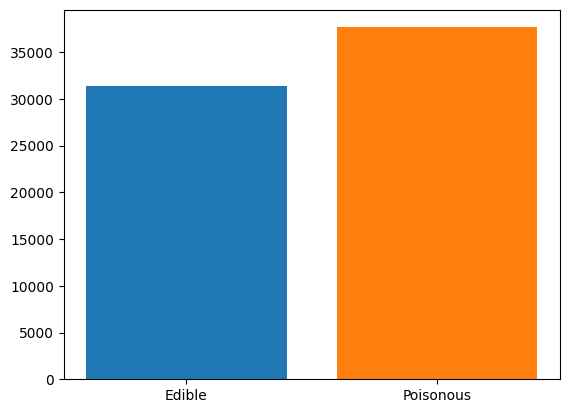

In [5]:
plt.bar('Edible', classes['No'])

plt.bar('Poisonous', classes['Yes'])

plt.show()

In [6]:
X = data.loc[:, ['veil-color','habitat', 'ring-type','cap-shape','spore-print-color','cap-color','gill-attachment','veil-type','gill-color', "gill-spacing", "cap-surface"]]

y = data.loc[:, 'class']

In [7]:
encoder = LabelEncoder()
for i in X.columns:
    X[i] = encoder.fit_transform(X[i])
    
y = encoder.fit_transform(y)

In [8]:
X

,veil-color,habitat,ring-type,cap-shape,spore-print-color,cap-color,gill-attachment,veil-type,gill-color,gill-spacing,cap-surface
0,4,2,7,3,9,3,4,2,10,4,0
1,4,0,7,3,5,7,4,2,10,4,0
2,4,7,7,5,5,6,4,2,4,4,0
3,4,2,7,3,9,6,4,2,4,4,9
4,4,0,9,3,5,1,4,2,10,3,0
...,...,...,...,...,...,...,...,...,...,...,...
69042,3,3,3,0,7,7,4,0,7,2,0
69043,3,3,3,2,7,7,4,0,7,2,0
69044,3,3,3,0,7,7,4,0,7,2,0
69045,3,3,3,2,7,7,4,0,7,2,0


In [9]:
y

array([1, 0, 0, ..., 1, 1, 1])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Creating and training models

In [11]:
decision_tree_model = DecisionTreeClassifier()

In [12]:
decision_tree_model.fit(X_train, y_train)

import joblib
joblib.dump(decision_tree_model, "decision_tree_model.pkl")

['decision_tree_model.pkl']

## Making predictions

In [13]:
tree_pred = decision_tree_model.predict(X_test)

## Comparing the performances

In [14]:
tree_report = classification_report(y_test, tree_pred)

In [15]:
print('Decision Tree')
print(tree_report)

Decision Tree
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9420
           1       0.99      0.99      0.99     11295

    accuracy                           0.99     20715
   macro avg       0.99      0.99      0.99     20715
weighted avg       0.99      0.99      0.99     20715



## Evaluation
Decision tree performed best.
Let's try the Random Forest algorithm to see if it works better.

In [16]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
random_forest_pred = random_forest_model.predict(X_test)

In [17]:
random_forest_report = classification_report(y_test, random_forest_pred)

print(random_forest_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9420
           1       0.99      0.99      0.99     11295

    accuracy                           0.99     20715
   macro avg       0.99      0.99      0.99     20715
weighted avg       0.99      0.99      0.99     20715

